<a href="https://colab.research.google.com/github/Osama789/Machine_Learning_Project/blob/main/Diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
diabetics_dataset = pd.read_csv('/diabetes_2.csv')
diabetics_dataset.head() #to show first 5 row of this dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetics_dataset.shape #to know the size

(768, 9)

In [ ]:
diabetics_dataset.describe() #stat details

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetics_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X = diabetics_dataset.drop(columns= 'Outcome',axis =1)

In [ ]:
Y= diabetics_dataset['Outcome']

print(X)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
s=scaler.transform(X)

In [ ]:
print(s)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X=s


In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X_train.shape,X_test.shape)

(614, 8) (154, 8)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction=classifier.predict(X_train)

In [ ]:
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print(training_data_accuracy)

0.7866449511400652


In [ ]:
X_test_prediction = classifier.predict(X_test)

In [ ]:
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print(test_data_accuracy)

0.7727272727272727


In [ ]:
input_data= (1,89,66,23,94,28.1,0.167,21)

In [ ]:
input_data_np=np.asarray(input_data)

In [ ]:
input_data_reshape=input_data_np.reshape(1,-1)

In [ ]:
print(input_data_reshape)

[[ 1.    89.    66.    23.    94.    28.1    0.167 21.   ]]


In [ ]:
std_data = scaler.transform(input_data_reshape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
print(std_data)

[[-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]]


In [ ]:
prediction=classifier.predict(std_data)
print(prediction)

[0]


In [ ]:
if (prediction[0]==0):
  print("No diabetics")
else:
  print("Diabetics")

No diabetics


In [ ]:
print(test_data_accuracy)

0.7727272727272727


In [ ]:
print(training_data_accuracy)

0.7866449511400652


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb=GaussianNB()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
gnb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
X_train_prediction_2=gnb.predict(X_train)
training_data_accuracy_1=accuracy_score(X_train_prediction_2,Y_train)

In [ ]:
print(training_data_accuracy_1)

0.755700325732899


In [ ]:
X_test_prediction_1 = gnb.predict(X_test)
training_data_accuracy_2=accuracy_score(X_test_prediction_1,Y_test)
print(training_data_accuracy_2)

0.7727272727272727


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)


RandomForestClassifier()

In [ ]:
X_train_prediction_3=rf.predict(X_train)
training_data_accuracy_2=accuracy_score(X_train_prediction_3,Y_train)
print(training_data_accuracy_2)

1.0


In [ ]:
X_test_prediction_2 = rf.predict(X_test)
training_data_accuracy_3=accuracy_score(X_test_prediction_2,Y_test)
print(training_data_accuracy_3)

0.7597402597402597


In [ ]:
from sklearn.model_selection import cross_val_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
k_fold = 5
cross_val_scores = cross_val_score(rf_classifier, X_train, Y_train, cv=k_fold, scoring='accuracy')
print("Cross-validation scores:", cross_val_scores)
mean_accuracy = cross_val_scores.mean()
print("Mean Accuracy:", mean_accuracy)

Cross-validation scores: [0.76422764 0.76422764 0.80487805 0.78861789 0.71311475]
Mean Accuracy: 0.7670131947221112


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(X_test_prediction_2,Y_test)
print(precision)

0.5555555555555556


In [ ]:
precision_2 = precision_score(X_test_prediction,Y_test)
print(precision_2)

0.5185185185185185


In [ ]:
precision_3 = precision_score(X_test_prediction_1,Y_test)
print(precision_3)

0.5740740740740741


In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_1 = recall_score(X_test_prediction,Y_test)
recall_2 = recall_score(X_test_prediction_1,Y_test)
recall_3 = recall_score(X_test_prediction_2,Y_test)

In [ ]:
print(recall_1,recall_2,recall_3,precision,precision_2,precision_3)

0.7567567567567568 0.7209302325581395 0.6976744186046512 0.5555555555555556 0.5185185185185185 0.5740740740740741


In [ ]:
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(X_test_prediction,Y_test)
cm_2 = confusion_matrix(X_test_prediction_1,Y_test)
cm_3 = confusion_matrix(X_test_prediction_2,Y_test)
print(cm_1,cm_2,cm_3)

[[91 26]
 [ 9 28]] [[88 23]
 [12 31]] [[87 24]
 [13 30]]


In [ ]:
print(cm_1)
print(cm_2)
print(cm_3)

[[91 26]
 [ 9 28]]
[[88 23]
 [12 31]]
[[87 24]
 [13 30]]


In [ ]:
!pip install --upgrade scikit-learn


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

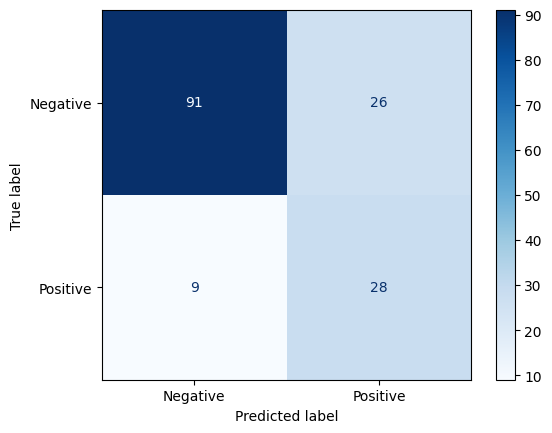

In [ ]:
cm_1_disp=ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=["Negative", "Positive"])
cm_1_disp.plot(cmap=plt.cm.Blues, values_format=".0f")

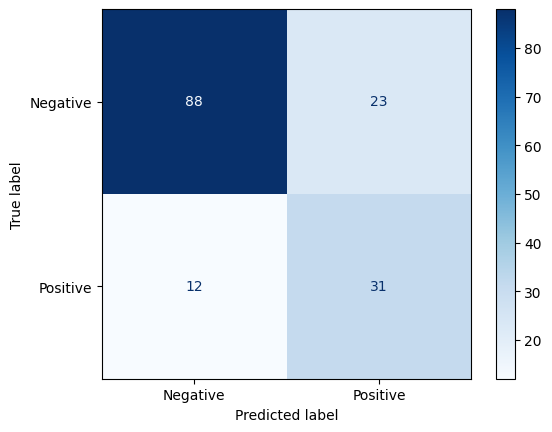

In [ ]:
cm_2_disp=ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=["Negative", "Positive"])
cm_2_disp.plot(cmap=plt.cm.Blues, values_format=".0f")

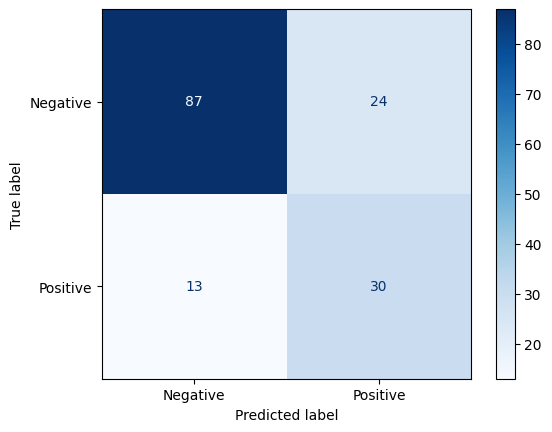

In [ ]:
cm_3_disp=ConfusionMatrixDisplay(confusion_matrix=cm_3,display_labels=["Negative", "Positive"])
cm_3_disp.plot(cmap=plt.cm.Blues, values_format=".0f")

In [ ]:
from sklearn.metrics import f1_score
f1_1 = f1_score(X_test_prediction,Y_test)
f1_2 = f1_score(X_test_prediction_1,Y_test)
f1_3 = f1_score(X_test_prediction_2,Y_test)
print(f1_1,f1_2,f1_3)

0.6153846153846154 0.6391752577319587 0.6185567010309279


In [ ]:
from sklearn.metrics import cohen_kappa_score
kappa_1 = cohen_kappa_score(X_test_prediction,Y_test)
kappa_2 = cohen_kappa_score(X_test_prediction_1,Y_test)
kappa_3 = cohen_kappa_score(X_test_prediction_2,Y_test)
print(kappa_1,kappa_2,kappa_3)

0.46196845677779985 0.4763940159316107 0.4464736739848456


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_1 = roc_auc_score(X_test_prediction,Y_test)
roc_auc_2 = roc_auc_score(X_test_prediction_1,Y_test)
roc_auc_3 = roc_auc_score(X_test_prediction_2,Y_test)
print(roc_auc_1,roc_auc_2,roc_auc_3)

0.7672672672672672 0.7568615126754661 0.7407291011942174
